In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
city_data = 'C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/Matplotlib HW/city_data.csv'
ride_data = 'C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/Matplotlib HW/ride_data.csv'

In [4]:
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

In [5]:
#Read city data
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
#Read ride data
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
#Merging the datasets
merged_data = pd.merge(city_df, ride_df, on="city")
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [8]:
# average fares per city
average_fare = merged_data.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [9]:
# total number of rides per city
rides_per_city = merged_data.groupby("city")["ride_id"].count()
rides_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [10]:
# total number of drivers per city
drivers_per_city = merged_data.groupby("city")["driver_count"].mean()
drivers_per_city.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [11]:
# city type
city_type = city_df.set_index("city")["type"]
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [12]:
Summary_df = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides":rides_per_city,
                 "Number of Drivers":drivers_per_city,
                 "City Type": city_type
})
Summary_df.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [13]:
# Urban rides 
Urban = Summary_df.loc[Summary_df["City Type"]== "Urban"]
Urban.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Deanville,25.842632,19,49,Urban


In [14]:
# Suburban rides 
Suburban = Summary_df.loc[Summary_df["City Type"]== "Suburban"]
Suburban.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Brandonfort,35.437368,19,10,Suburban
Colemanland,30.894545,22,23,Suburban
Davidfurt,31.995882,17,23,Suburban


In [15]:
# Rural rides 
Rural = Summary_df.loc[Summary_df["City Type"]== "Rural"]
Rural.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Bradshawfurt,40.064000,10,7,Rural
Garzaport,24.123333,3,7,Rural
Harringtonfort,33.470000,6,4,Rural
Jessicaport,36.013333,6,1,Rural
Lake Jamie,34.358333,6,4,Rural


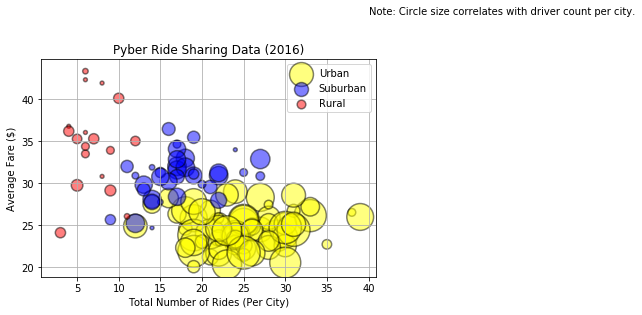

In [16]:
#Urban plot
plt.scatter(Urban["Number of Rides"], 
            Urban["Average Fare per City"], color = "yellow", 
            edgecolors="black", s = Urban["Number of Drivers"]*15, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban plot
plt.scatter(Suburban["Number of Rides"], 
            Suburban["Average Fare per City"], color = "blue", 
            edgecolors="black", s = Suburban["Number of Drivers"]*15, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural plot 
plt.scatter(Rural["Number of Rides"], 
            Rural["Average Fare per City"], color = "red", 
            edgecolors="black", s = Rural["Number of Drivers"]*15, label = "Rural", alpha = 0.5, linewidth = 1.5)


#Adding plot formating.

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")

plt.legend(loc= "upper right")

plt.grid()

plt.savefig('C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/Matplotlib HW/Pyber1.png')


#Show plot.
plt.show()

In [17]:
# Total fare per type (will sum the total fare per type) 

sum_per_type = merged_data.groupby(["type"])["fare"].sum()
sum_per_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
sum_per_type.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

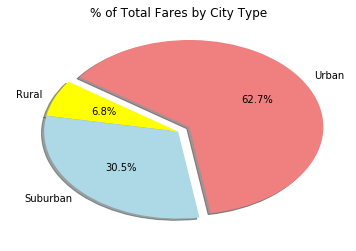

In [19]:
#Color selection
colors = ["yellow", "lightblue", "lightcoral"]

#Formatting

explode = (0,0, 0.1)

#Ploting 
plt.pie(sum_per_type, labels = sum_per_type.index, 
        autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 145)


plt.title("% of Total Fares by City Type")

plt.savefig('C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/Matplotlib HW/Pyber2.png')

#Showing the chart.
plt.show()

In [20]:
# Total rides per city type (will sum the total rides per type) 
sum_per_ride = merged_data.groupby(["type"])["ride_id"].count()
sum_per_ride

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

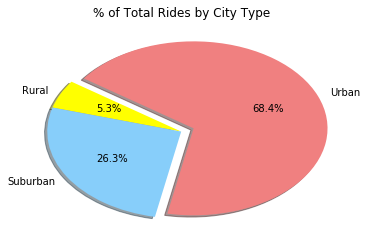

In [21]:
#Color selection
colors = ["yellow", "lightskyblue", "lightcoral"]

#Formating

explode = (0,0, 0.1)

#Ploting
plt.pie(sum_per_ride, labels = sum_per_ride.index, 
        autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 145)



plt.title("% of Total Rides by City Type")

plt.savefig('C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/Matplotlib HW/Pyber3.png')

#Showing the chart.
plt.show()

In [22]:
# drop duplicates
new_df = merged_data.drop_duplicates(['city'], keep ='first')

#Total Drivers per City type
sum_per_driver = new_df.groupby(["type"])["driver_count"].sum()
sum_per_driver

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

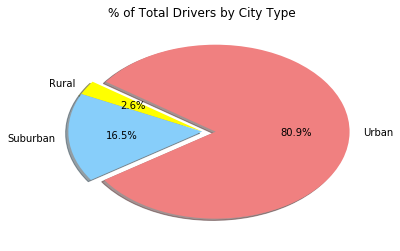

In [23]:
#Color selection
colors = ["yellow", "lightskyblue", "lightcoral"]

#Formating

explode = (0,0, 0.1)

#Ploting
plt.pie(sum_per_driver, labels = sum_per_driver.index, 
        autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 145)


plt.title("% of Total Drivers by City Type")

plt.savefig('C:/Users/CAEAIZPU/OneDrive - kochind.com/Desktop/Matplotlib HW/Pyber4.png')

#Showing the chart.
plt.show()

In [24]:
#Comments:
# 1 - Urban rides show the highest number of rides per city (68.4%). However, their average fare ($) is 
# lower (<30$) compared to rural and suburban. this is due to that most of these rides are for short distances. 


## 2 - the highest fares are for rural rides (some of them above 40$). this is because of larger distances. 
## In addition to this, they may be 
## more expensive but they are less frequent based on the plot Rides by City Type (5.3%).

### 3 - Due to the lower demand to rural rides, you can find less drivers for this type of cities. More than 80% of 
### the drivers are focused on urban rides. they are less expensive but more frequent.
